In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

# LAB 1

## Step 1

### Creation of the graph, without occupancy

In [2]:
nodes = pd.read_csv('Documentation/nodes.csv', header=None, index_col=0, names=["Node","x_position","y_position"])
edges = pd.read_csv('Documentation/links.csv', header=None, names=[
    "Link ID", 
    "Length (m)",
    "Number of lanes", 
    "Starting node ID",
    "Ending node ID", 
    "Region"], index_col=0)
print(nodes.head(5),"\n", edges.head(5))



      x_position  y_position
Node                        
1         429948     4581385
2         431582     4580937
3         432524     4583069
4         432650     4582536
5         432645     4582410 
          Length (m)  Number of lanes  Starting node ID  Ending node ID  Region
Link ID                                                                       
512      109.223913                3             21109           19069       4
513      129.668254                3             19067           21109       4
514      133.572478                2             19065           21042       4
516       47.649608                2                11           19201       3
593       96.553539                3             18703              84       4


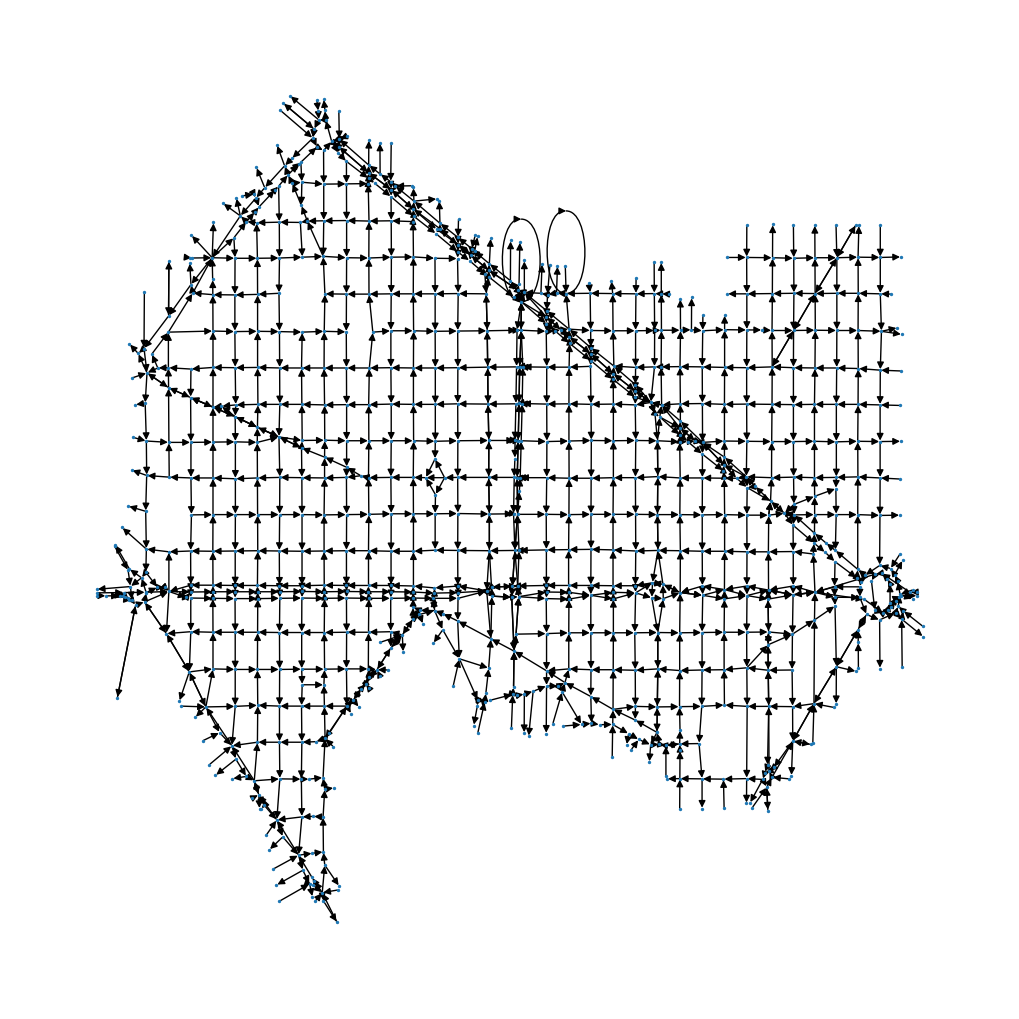

In [3]:
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region"],
                            create_using=nx.MultiDiGraph)
plt.figure(figsize=(10,10))
nx.draw(G, node_size = 2, pos=nodes.transpose())
plt.show()

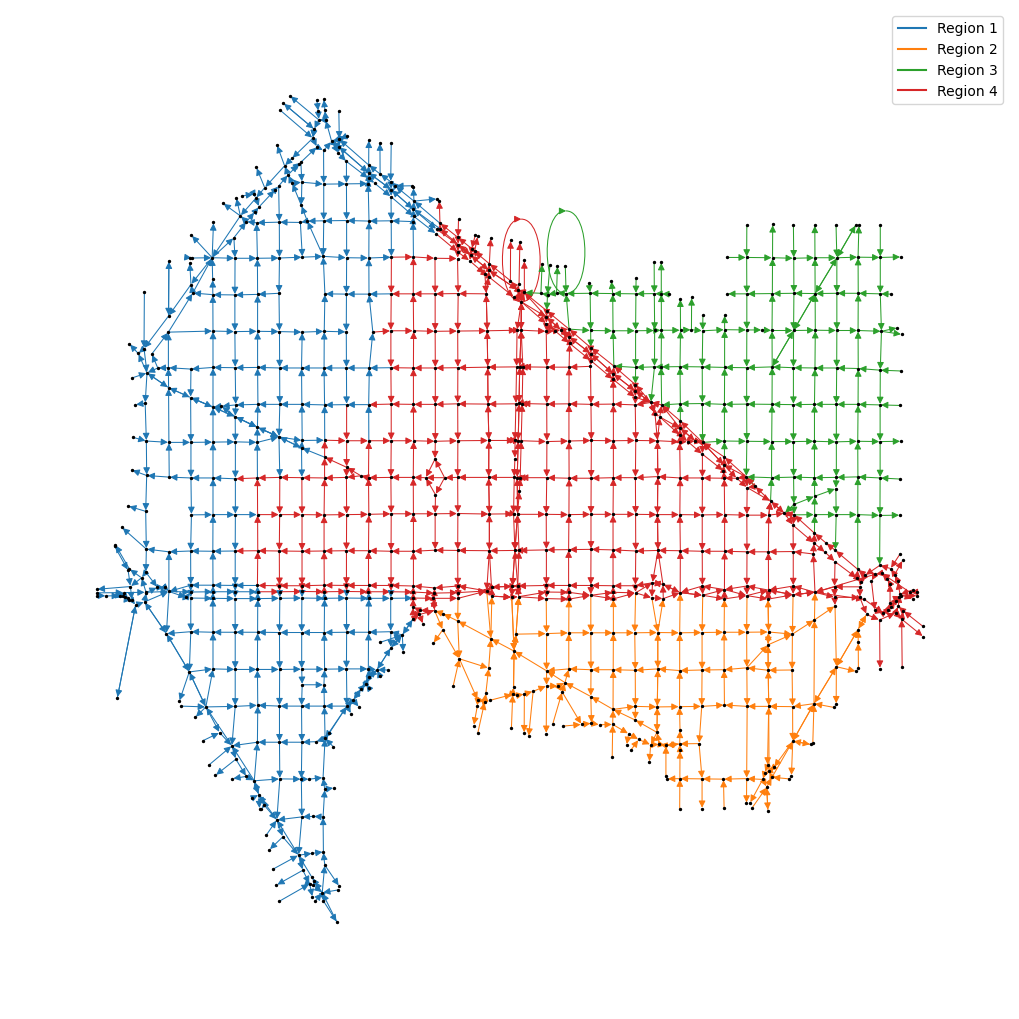

In [4]:
edges["region_color"] = edges.Region.map(lambda x:f"C{x-1}")
G = nx.from_pandas_edgelist(edges, 
                            source = "Starting node ID", 
                            target= "Ending node ID", 
                            edge_attr=["Length (m)", "Number of lanes", "Region", "region_color"],
                            create_using=nx.MultiDiGraph)

artists_legend = [mlines.Line2D([],[], c=f"C{r-1}", label=f"Region {r}") for r in [1,2,3,4]]
plt.figure(figsize=(10,10))
nx.draw(G, node_size = 2, pos=nodes.transpose(), edge_color = list(nx.get_edge_attributes(G,"region_color").values()), width=0.75, node_color="k")
plt.legend(handles=artists_legend)
plt.savefig("Pictures/Network_Regions.png")
plt.show()

### Adding occupancy

In [5]:
occupancy = pd.read_csv('Documentation/occupancy.csv', index_col = 0)

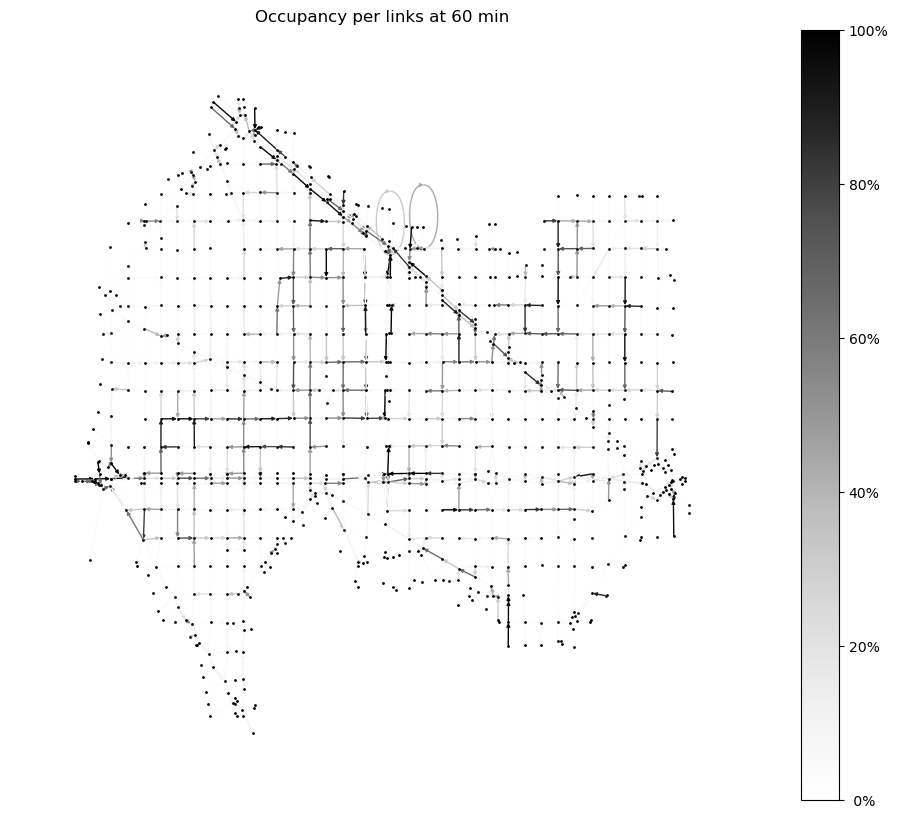

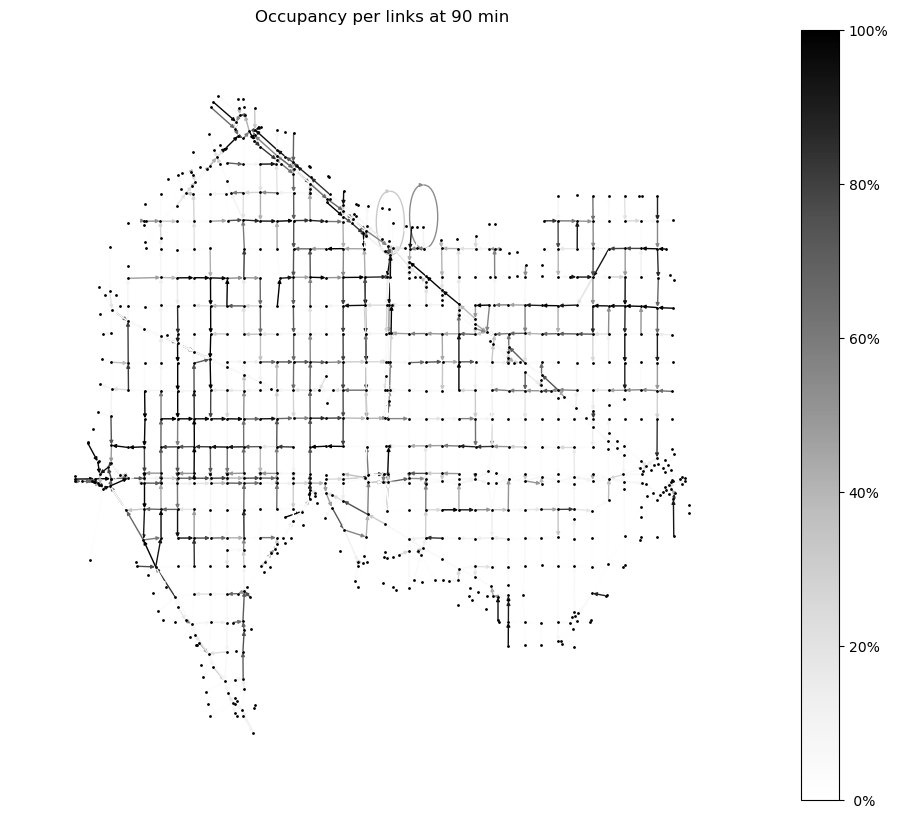

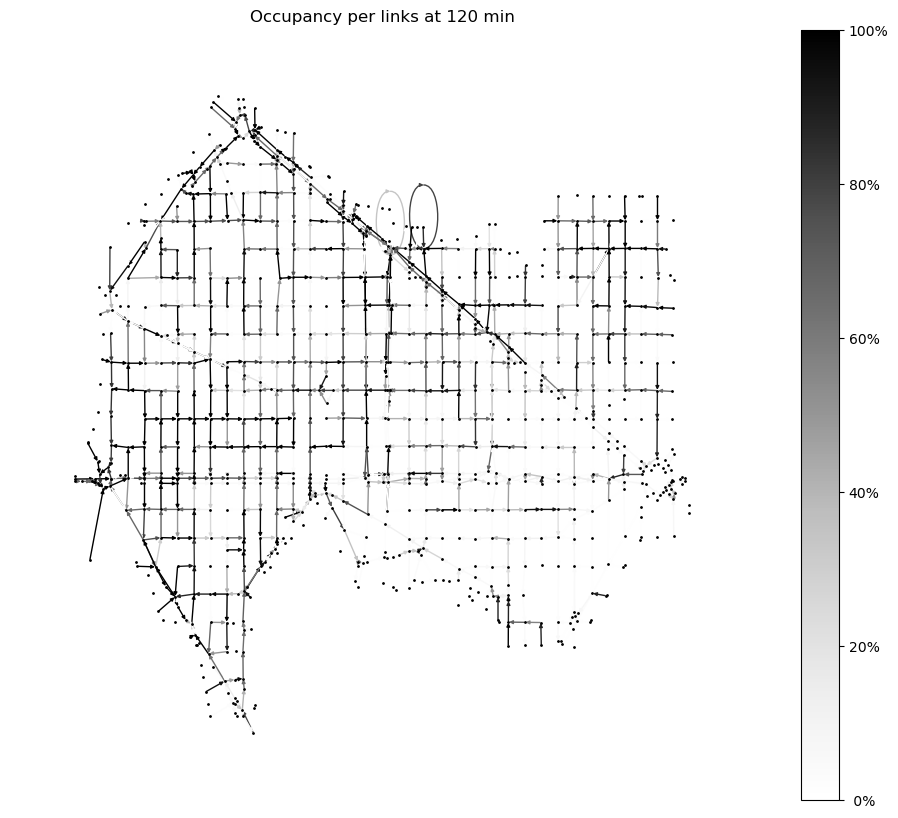

In [6]:
def plot_occupancy_at_t (time_in_minutes):
    time = time_in_minutes * 60
    occupancy_at_t = occupancy.loc[time]
    occupancy_at_t.name = "Occupancy"
    occupancy_at_t.index = occupancy_at_t.index.astype("int")
    edges_at_t = pd.concat((edges, occupancy_at_t),axis=1).copy(deep=True)

    G = nx.from_pandas_edgelist(edges_at_t, 
                                create_using = nx.MultiDiGraph, 
                                source = "Starting node ID", 
                                target= "Ending node ID", 
                                edge_attr=["Length (m)", "Number of lanes", "Region","Occupancy"])

    # Create a colormap
    cmap = plt.get_cmap('Greys')

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.title(f"Occupancy per links at {time_in_minutes} min")
    nx.draw(G, node_color="0", arrowsize=5, node_size=1, pos=nodes.transpose(), edge_cmap=cmap, edge_color=list(nx.get_edge_attributes(G,"Occupancy").values()), ax=ax)

    # Create the ScalarMappable
    sm = plt.cm.ScalarMappable(mcolors.Normalize(vmin = 0, vmax=100), cmap=cmap)

    # Add the colorbar
    cbar = plt.colorbar(sm, ax=ax, format="%2d%%")

for t in [60, 90, 120] :
    plot_occupancy_at_t(t)
    plt.savefig(f"Pictures/Gray_Scale_{t}min.png")
    plt.show()

## Step 2

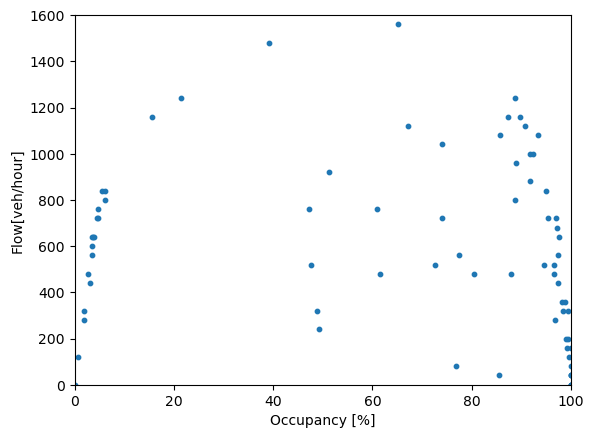

In [7]:
flow = pd.read_csv('Documentation/flow.csv', index_col = 0)

number_link = 514

flow_l = flow.loc[:, f'{number_link}']*3600/90
occpuancy_single_road = occupancy.loc[:, f'{number_link}']
#print(flow_l)
#print(flow.shape)
#print(occpuancy_single_road.shape)

plt.scatter(occpuancy_single_road, flow_l, s=10)
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()



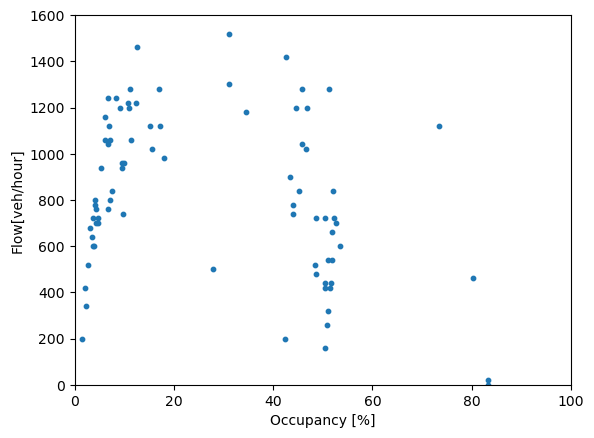

In [8]:
number_link = [516, 512]

        
flow_l= flow[[f'{number_link[0]}', f'{number_link[1]}']]

flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[[f'{number_link[0]}', f'{number_link[1]}']]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10)   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]") 
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()


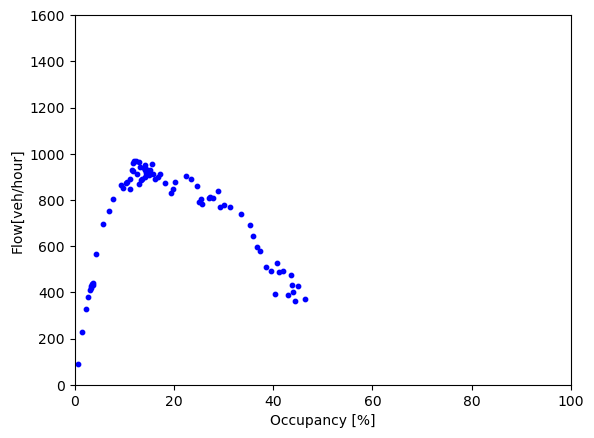

In [9]:
region = 1

number_link = []

for index in edges.index:
    if edges.loc[index]["Region"] == region:
        number_link.append(str(index))
       
flow_l= flow[number_link]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[number_link]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10, c="Blue")   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
plt.show()

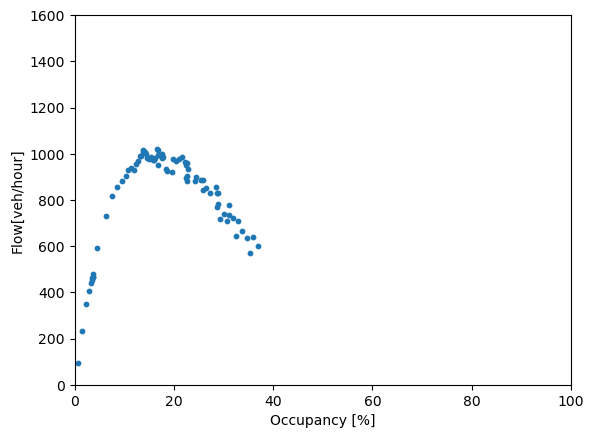

In [10]:
number_link = [ ]

for index in edges.index:
    
    number_link.append(str(index))

flow_l= flow[number_link]
flow_mean = flow_l.mean(axis=1)*3600/90

occupancy_l = occupancy[number_link]
occupancy_mean = occupancy_l.mean(axis=1)

plt.scatter(occupancy_mean, flow_mean, s=10)   
plt.xlabel("Occupancy [%]")
plt.ylabel("Flow[veh/hour]")
plt.xlim(0, 100)
plt.ylim(0,1600)
    
    

plt.show()

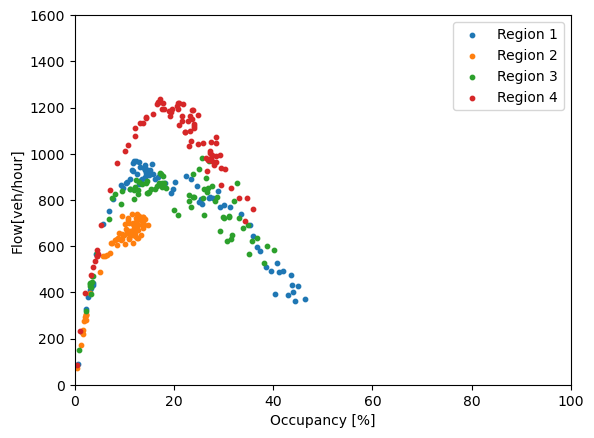

In [11]:
Region = [1,2,3,4]

for region in Region:

    number_link = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link.append(str(index))
        
    flow_l= flow[number_link]
    flow_mean = flow_l.mean(axis=1)*3600/90

    occupancy_l = occupancy[number_link]
    occupancy_mean = occupancy_l.mean(axis=1)

    plt.scatter(occupancy_mean, flow_mean, label=f'Region {region}', s= 10)   
    plt.xlabel("Occupancy [%]")
    plt.ylabel("Flow[veh/hour]")
    plt.xlim(0, 100)
    plt.ylim(0,1600)

plt.legend()
plt.show()

## Step 3

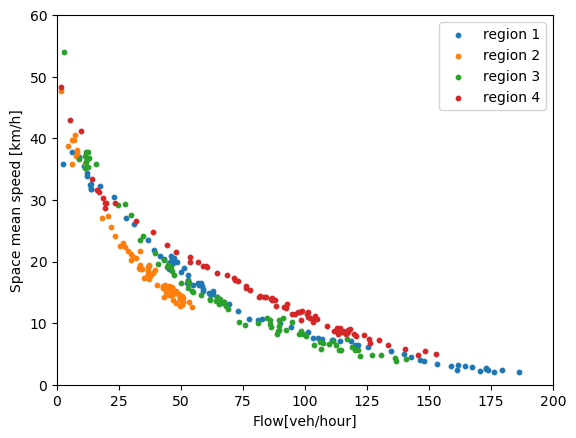

In [12]:
Region = [1,2,3,4]

for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy() 

    
    number_lane = np.diag(number_lane)

    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)


    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

 
    average_density = np.mean(density,axis=1)

    plt.scatter(average_density, mean_speed, label=f'region {region}', s=10)   
    
    plt.ylabel("Space mean speed [km/h]")
    plt.xlabel("Flow[veh/hour]")
    plt.xlim(0, 200)
    plt.ylim(0,60)
   
plt.legend()    
plt.show()

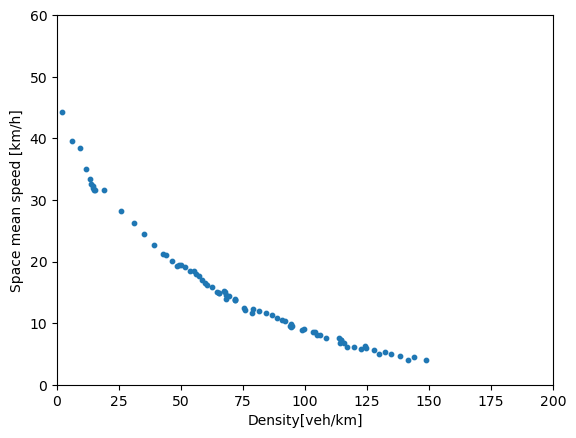

In [13]:

number_link_int = []
number_link_str = []

L = 5/1000
Ld = 2/1000

for index in edges.index:
    
    number_link_int.append(int(index))
    number_link_str.append(str(index))

number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


occupancy_region = occupancy[number_link_str].to_numpy() 

number_lane = np.diag(number_lane)


density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)



flow_region = flow[number_link_str].to_numpy()*3600/90



link_speed = flow_region@np.transpose(density)



length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)


average_density = np.mean(density,axis=1)

plt.scatter(average_density, mean_speed, s=10)   

plt.xlabel("Density[veh/km]")
plt.ylabel("Space mean speed [km/h]")
plt.xlim(0, 200)
plt.ylim(0,60)  
plt.show()

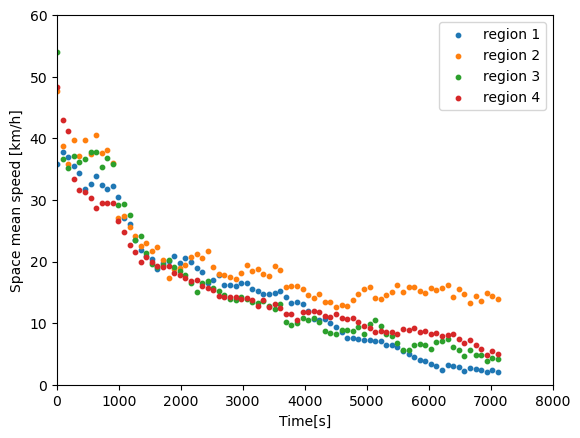

In [14]:
Region = [1,2,3,4]

t = np.arange(0,80)*90
for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy() 
    
    number_lane = np.diag(number_lane)


    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)

    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

    average_density = np.mean(density,axis=1)

    plt.scatter(t, mean_speed, label=f'region {region}', s=10)   
    
plt.ylabel("Space mean speed [km/h]")
plt.xlabel("Time[s]")
plt.xlim(0, 8000)
plt.ylim(0,60)  
   
plt.legend()    
plt.show()

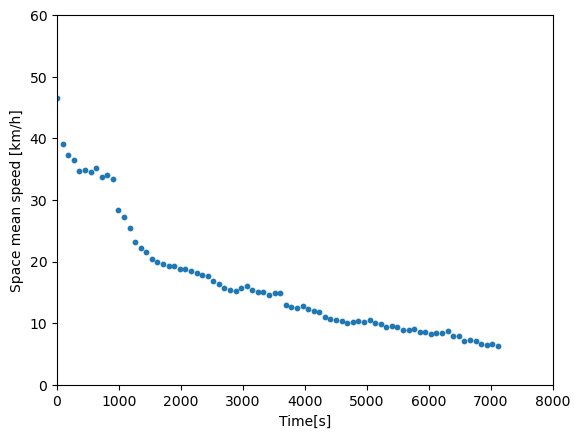

In [15]:
Region = [1,2,3,4]

t = np.arange(0,80)*90

mean_speed_mean = [[],[],[],[]]

for region in Region:


    number_link_int = []
    number_link_str = []

    L = 5/1000
    Ld = 2/1000

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            number_link_int.append(int(index))
            number_link_str.append(str(index))

    number_lane = edges.loc[number_link_int, "Number of lanes"].to_numpy()
    length_lane = edges.loc[number_link_int, "Length (m)"].to_numpy()


    occupancy_region = occupancy[number_link_str].to_numpy()
    number_lane = np.diag(number_lane)

    density = (occupancy_region/100)@np.transpose(number_lane)/(Ld + L)



    flow_region = flow[number_link_str].to_numpy()*3600/90


    link_speed = flow_region@np.transpose(density)


    length_lane = np.tile(length_lane, (length_lane.shape[0], 1))


    mean_speed = np.sum(flow_region@length_lane, axis=1)/np.sum(density@length_lane, axis=1)

 
    mean_speed_mean[region-1] = mean_speed

mean_speed_mean = np.array(mean_speed_mean)

mean_speed_mean = np.mean(mean_speed_mean, axis=0)


plt.ylabel("Space mean speed [km/h]")
plt.xlabel("Time[s]")
plt.xlim(0, 8000)
plt.ylim(0,60)  
   
plt.scatter(t, mean_speed_mean, s =10)       
plt.show()

## Step 4

In [16]:
def density_link(link):
    L = 5/1000
    Ld = 2/1000
    number_lane = edges.loc[link, "Number of lanes"]
    occupancy_link = occupancy[str(link)] #%
    density = occupancy_link / 100 * number_lane / (L + Ld)
    return density

def accumulation_link(link):
    length = edges.loc[link, "Length (m)"]/1000
    density = density_link(link)
    accumulation = length * density
    return accumulation
    
def production_link(link):
    length = edges.loc[link, "Length (m)"]/1000
    volume = flow.loc[:, f'{link}'] * 3600 / 90 # Same volume as in part 2
    production = volume * length
    return production

def accumulation_2links(links):
    accumulations = []

    for link in links:
        acc = accumulation_link(link)
        accumulations.append(acc.to_numpy())

    return accumulations

def production_2links(links):
    productions = []

    for link in links:
        prod = production_link(link)
        productions.append(prod.to_numpy())
    
    return productions

def accumulation_region(region):
    accumulations = []
    links = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        acc = accumulation_link(link)
        accumulations.append(acc.to_numpy())

    return accumulations  

def production_region(region):
    productions = []
    links = []

    for index in edges.index:
        if edges.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        prod = production_link(link)
        productions.append(prod.to_numpy())
        
    return productions 


4.1 - Single link

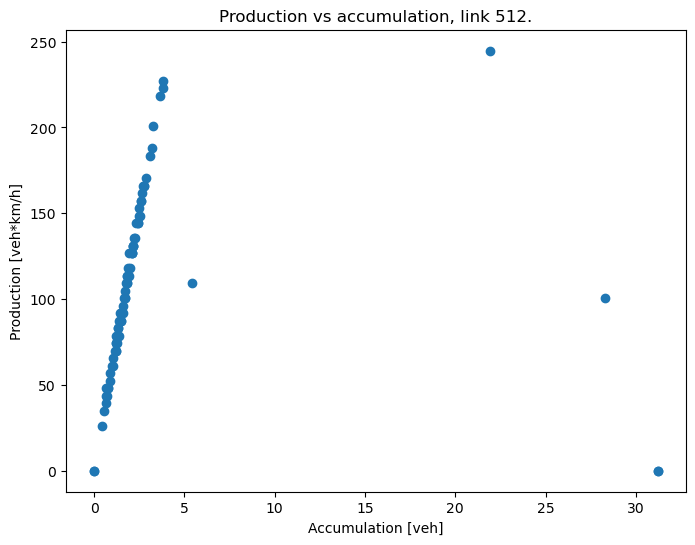

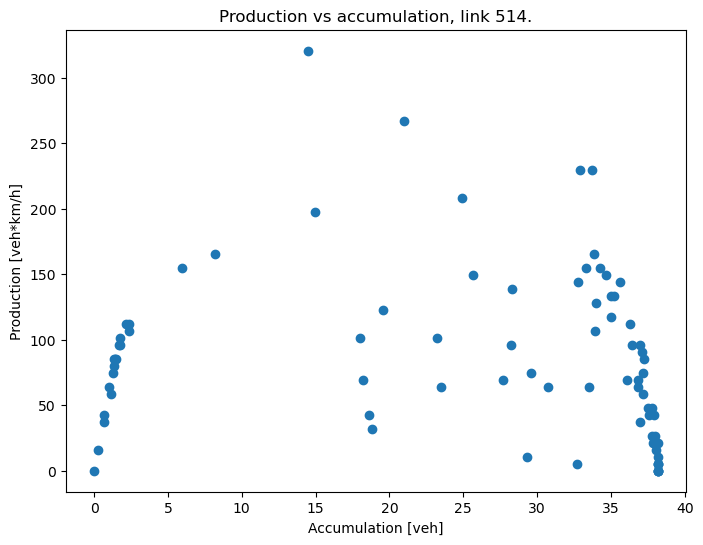

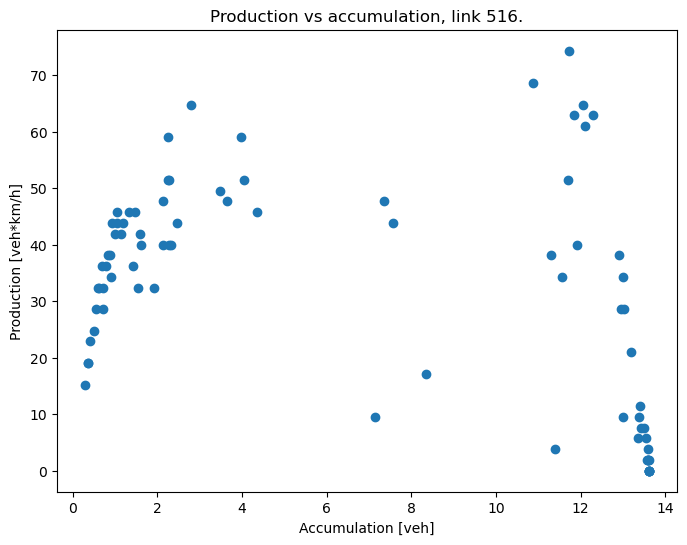

In [17]:
links = [512, 514, 516]

for link in links:
    plt.figure(figsize=(8,6))
    plt.title(f'Production vs accumulation, link {link}.')
    plt.scatter(accumulation_link(link), production_link(link))
    plt.xlabel('Accumulation [veh]')
    plt.ylabel('Production [veh*km/h]')
    plt.show()

4.2 - Two links

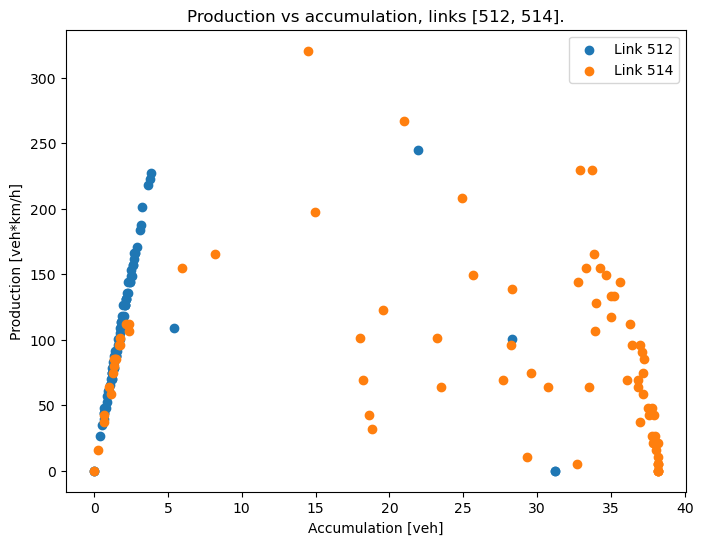

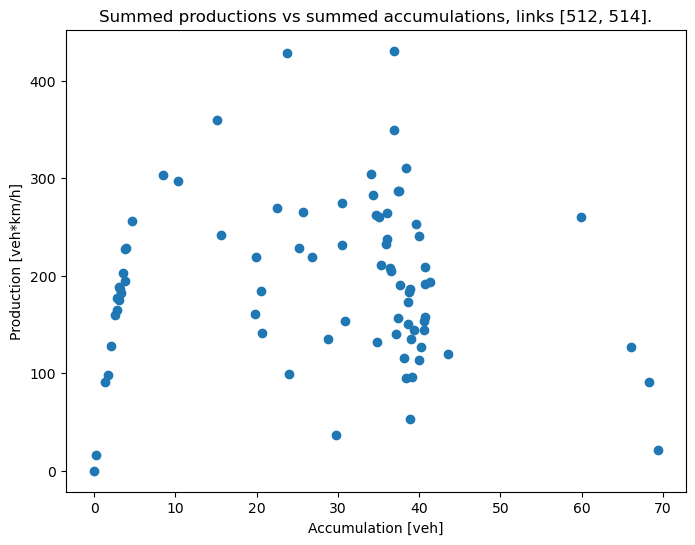

In [18]:
links = [512, 514]

accumulations = []
productions = []

summed_accumulations = []
summed_productions = []

accumulations = accumulation_2links(links)
productions = production_2links(links)

summed_accumulations = np.sum(accumulations, axis = 0)
summed_productions = np.sum(productions, axis = 0)


plt.figure(figsize=(8,6))
plt.title(f'Production vs accumulation, links {links}.')
for i in range(len(links)):
    plt.scatter(accumulations[i], productions[i], label = f'Link {links[i]}')
plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.title(f'Summed productions vs summed accumulations, links {links}.')
plt.scatter(summed_accumulations, summed_productions)
plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.show()

4.3 - All regions

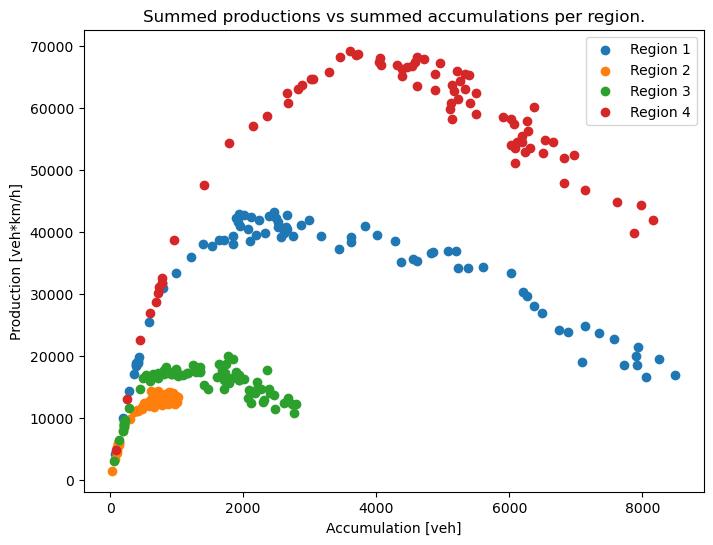

In [19]:
regions = [1,2,3,4]

plt.figure(figsize=(8,6))
plt.title(f'Summed productions vs summed accumulations per region.')

for region in regions:
    summed_accumulations = np.sum(accumulation_region(region), axis = 0)
    summed_productions = np.sum(production_region(region), axis = 0)
    plt.scatter(summed_accumulations, summed_productions, label = f"Region {region}")

plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
plt.legend()
plt.show()

## Step 5

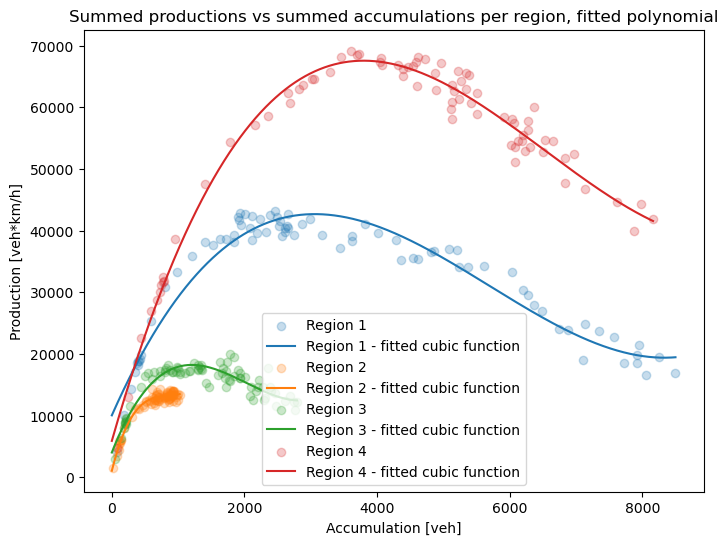

In [20]:
regions = [1,2,3,4]
summed_accumulations = {}
summed_productions = {}
polyfit = {}
for region in regions:
    summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
    summed_productions[region] = np.sum(production_region(region), axis = 0)

plt.figure(figsize=(8,6))
plt.title(f'Summed productions vs summed accumulations per region, fitted polynomial')

for region in regions:
    summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
    summed_productions[region] = np.sum(production_region(region), axis = 0)
    polyfit[region] = np.polyfit(summed_accumulations[region], summed_productions[region], 3)

    xx = np.linspace(0, max(summed_accumulations[region]), 2001)
    plt.scatter(summed_accumulations[region], summed_productions[region], label = f"Region {region}", alpha=0.25)
    plt.plot(xx, np.polyval(polyfit[region], xx), label = f"Region {region} - fitted cubic function")

plt.xlabel('Accumulation [veh]')
plt.ylabel('Production [veh*km/h]')
#plt.ylim([0, round(max(map(max, summed_productions.values()))*1.1)])
plt.legend()
plt.savefig("Pictures/STEP5_FittedPolynomials.png")
plt.show()

In [21]:
[print(f"Region {r} : ", np.polynomial.Polynomial(polyfit[r][::-1])) for r in regions]
[print(polyfit[r]) for r in regions]

Region 1 :  10036.59989528 + 24.31229126 x - 0.00543222 x**2 + (3.17924639e-07) x**3
Region 2 :  1051.05512373 + 42.36356182 x - 0.05052738 x**2 + (2.05214568e-05) x**3
Region 3 :  4006.5260149 + 27.44483801 x - 0.01621151 x**2 + (2.67381788e-06) x**3
Region 4 :  5891.28708841 + 37.63671491 x - 0.0069903 x**2 + (3.57060232e-07) x**3
[ 3.17924639e-07 -5.43221721e-03  2.43122913e+01  1.00365999e+04]
[ 2.05214568e-05 -5.05273822e-02  4.23635618e+01  1.05105512e+03]
[ 2.67381788e-06 -1.62115147e-02  2.74448380e+01  4.00652601e+03]
[ 3.57060232e-07 -6.99029502e-03  3.76367149e+01  5.89128709e+03]


[None, None, None, None]

In [22]:
def accumulation_sample(region, edges_sample):
    accumulations = []
    links = []

    for index in edges_sample.index:
        if edges_sample.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        acc = accumulation_link(link)
        accumulations.append(acc.to_numpy())

    return accumulations

def production_sample(region, edges_sample):
    productions = []
    links = []

    for index in edges_sample.index:
        if edges_sample.loc[index]["Region"] == region:
            links.append(int(index))

    for link in links:
        prod = production_link(link)
        productions.append(prod.to_numpy())
        
    return productions 

def plot_sample(edges_sample, strategy):
    regions = [1,2,3,4]
    summed_accumulations = {}
    summed_productions = {}
    polyfit = {}
    summed_accumulations_sample = {}
    summed_productions_sample = {}
    polyfit_sample = {}

    
    scales = (edges.groupby("Region")["Length (m)"].sum() / edges_sample.groupby("Region")["Length (m)"].sum())

    plt.figure(figsize=(8,8))
    plt.title(f'Summed productions vs summed accumulations per region (Strategy {strategy})')

    for region in regions:
        summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
        summed_productions[region] = np.sum(production_region(region), axis = 0)
        summed_accumulations_sample[region] = np.sum(accumulation_sample(region, edges_sample), axis = 0) * scales[region]
        summed_productions_sample[region] = np.sum(production_sample(region, edges_sample), axis = 0) * scales[region]
        polyfit[region] = np.polyfit(summed_accumulations[region], summed_productions[region], 3)
        polyfit_sample[region] = np.polyfit(summed_accumulations_sample[region], summed_productions_sample[region], 3)

        xx_unsample = np.linspace(0, max(summed_accumulations[region]), 2001)
        xx_sample = np.linspace(0, max(summed_accumulations_sample[region]), 2001)

        plt.scatter(summed_accumulations[region], summed_productions[region], label = f"Unsampled" if region==1 else None, color="grey", alpha=0.05)
        plt.plot(xx_unsample, np.polyval(polyfit[region], xx_unsample), label = f"Unsampled" if region==1 else None, color="grey", alpha=0.25)

        
        plt.scatter(summed_accumulations_sample[region], summed_productions_sample[region], label = f"Region {region}, sampled", alpha=0.25)
        plt.plot(xx_sample, np.polyval(polyfit_sample[region], xx_sample), label = f"Region {region}, sampled - fitted cubic function")

    plt.xlabel('Scaled Accumulation [veh]')
    plt.ylabel('Scaled Production [veh*km/h]')
    #plt.ylim([0, round(max(map(max, summed_productions.values()))*1.1)])
    plt.legend()
    plt.savefig(f"Pictures/STEP5_Strategy{strategy}_allRegions.png")
    plt.show()

    return polyfit_sample

def plot_sample_per_region(edges_sample, strategy):
    regions = [1,2,3,4]
    summed_accumulations = {}
    summed_productions = {}
    polyfit = {}
    summed_accumulations_sample = {}
    summed_productions_sample = {}
    polyfit_sample = {}

    scales = (edges.groupby("Region")["Length (m)"].sum() / edges_sample.groupby("Region")["Length (m)"].sum())

    plt.figure(figsize=(12,12), tight_layout = True)
    plt.suptitle(f"Summed productions vs summed accumulations per region (Strategy {strategy})")
    for region in regions:
        plt.subplot(2,2,region)
        plt.title(f"Region {region}")

        summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
        summed_productions[region] = np.sum(production_region(region), axis = 0)
        summed_accumulations_sample[region] = np.sum(accumulation_sample(region, edges_sample), axis = 0) * scales[region]
        summed_productions_sample[region] = np.sum(production_sample(region, edges_sample), axis = 0) * scales[region]
        polyfit[region] = np.polyfit(summed_accumulations[region], summed_productions[region], 3)
        polyfit_sample[region] = np.polyfit(summed_accumulations_sample[region], summed_productions_sample[region], 3)

        xx_unsample = np.linspace(0, max(summed_accumulations[region]), 2001)
        xx_sample = np.linspace(0, max(summed_accumulations_sample[region]), 2001)

        plt.scatter(summed_accumulations[region], summed_productions[region], label = f"Unsampled", color="grey", alpha=0.05)
        plt.scatter(summed_accumulations_sample[region], summed_productions_sample[region], label = f"Sampled", alpha=0.25, c = f"C{region-1}")
        plt.plot(xx_unsample, np.polyval(polyfit[region], xx_unsample), label = f"Unsampled - fitted cubic function", color="grey", alpha=0.25)
        plt.plot(xx_sample, np.polyval(polyfit_sample[region], xx_sample), label = f"Sampled - fitted cubic function", c = f"C{region-1}")

        plt.xlabel('Scaled Accumulation [veh]')
        plt.ylabel('Scaled Production [veh*k m/h]')
        #plt.ylim([0, round(max(map(max, summed_productions.values()))*1.1)])
        plt.legend()
        
    plt.savefig(f"Pictures/STEP5_Strategy{strategy}_subplotsregion.png")
    plt.show()


### Strategy 1 : Use links with the highest number of lanes

In [23]:
edges_sorted = edges.sort_values(by=["Region", "Number of lanes"], ascending=False)
edges_strategy_1 = edges_sorted.groupby("Region").apply(lambda x: x.head(len(x)//2))
edges_strategy_1.index = edges_strategy_1.index.get_level_values(1)
edges_strategy_1

,Length (m),Number of lanes,Starting node ID,Ending node ID,Region,region_color
Link ID,,,,,,
8144,71.272341,6,41937,40633,1,C0
8145,106.491211,6,40636,46937,1,C0
8338,18.683581,6,41892,41895,1,C0
10199,120.597656,6,40633,46925,1,C0
10201,97.848633,6,46925,46931,1,C0
...,...,...,...,...,...,...
9857,126.513302,3,21171,45518,4,C3
9859,136.991974,3,21015,21036,4,C3
9861,138.124942,3,44852,21036,4,C3


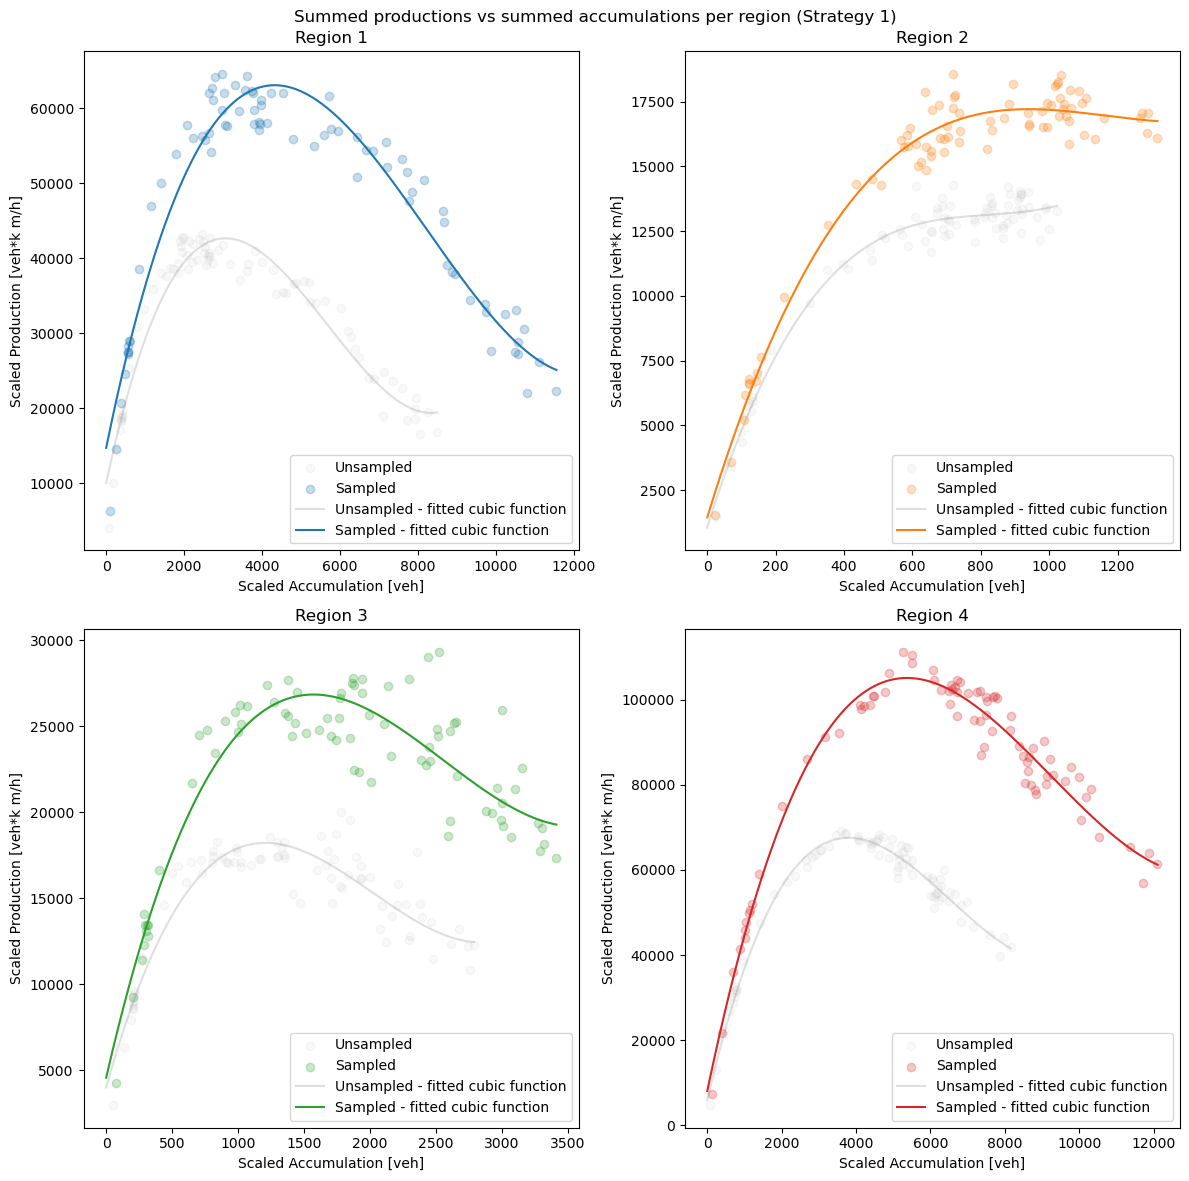

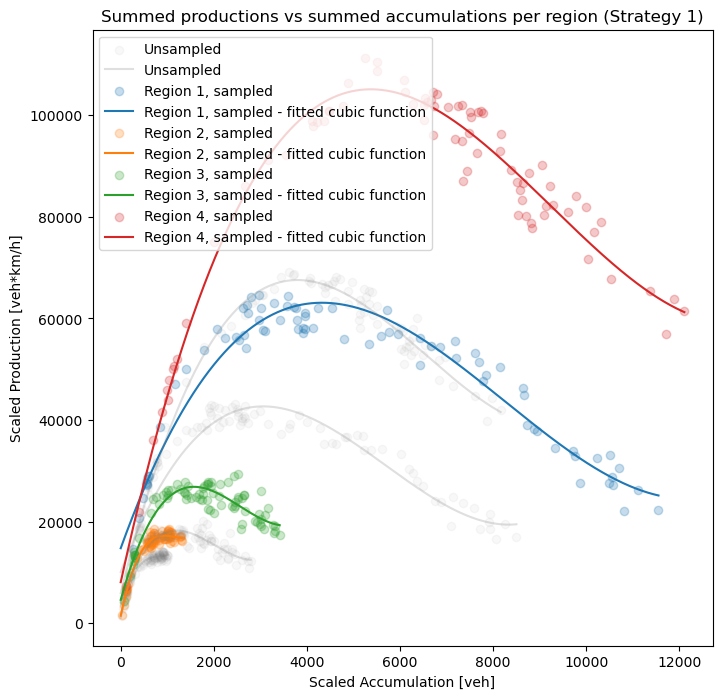

{1: array([ 1.61128171e-07, -3.98076489e-03,  2.53828110e+01,  1.47364586e+04]),
 2: array([ 1.11072099e-05, -3.87370427e-02,  4.33739706e+01,  1.44390846e+03]),
 3: array([ 1.98588144e-06, -1.52503302e-02,  3.32258780e+01,  4.57465352e+03]),
 4: array([ 1.98146372e-07, -5.49432165e-03,  4.18687082e+01,  8.05032096e+03])}

In [24]:
plot_sample_per_region(edges_strategy_1,  strategy=1)
plot_sample(edges_strategy_1,  strategy=1)

### Strategy 2 - Longest link length

In [25]:
edges_sorted = edges.sort_values(by=["Region", "Length (m)"], ascending=False)
edges_strategy_2 = edges_sorted.groupby("Region").apply(lambda x: x.head(len(x)//2))
edges_strategy_2.index = edges_strategy_2.index.get_level_values(1)
edges_strategy_2

,Length (m),Number of lanes,Starting node ID,Ending node ID,Region,region_color
Link ID,,,,,,
10719,349.464538,2,41895,40,1,C0
10718,348.648816,2,40,41895,1,C0
9307,241.371093,1,46668,44563,1,C0
17270,210.027714,3,23,20594,1,C0
8348,201.831532,5,6,41950,1,C0
...,...,...,...,...,...,...
9798,103.951255,2,45504,45312,4,C3
9814,103.875000,2,45697,45524,4,C3
10138,103.820551,2,21166,20988,4,C3


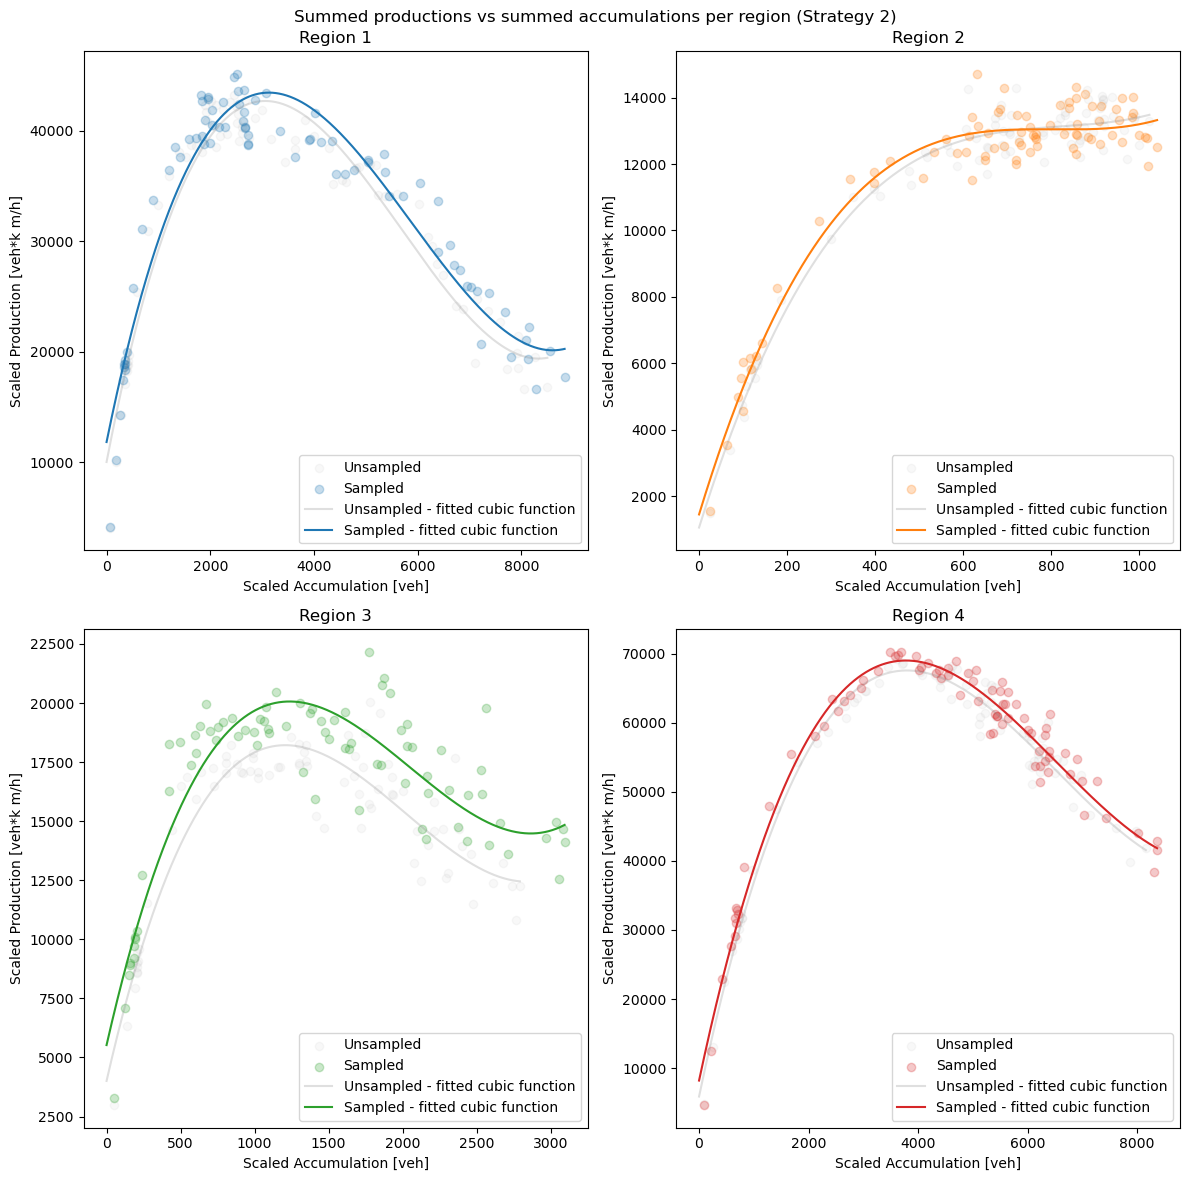

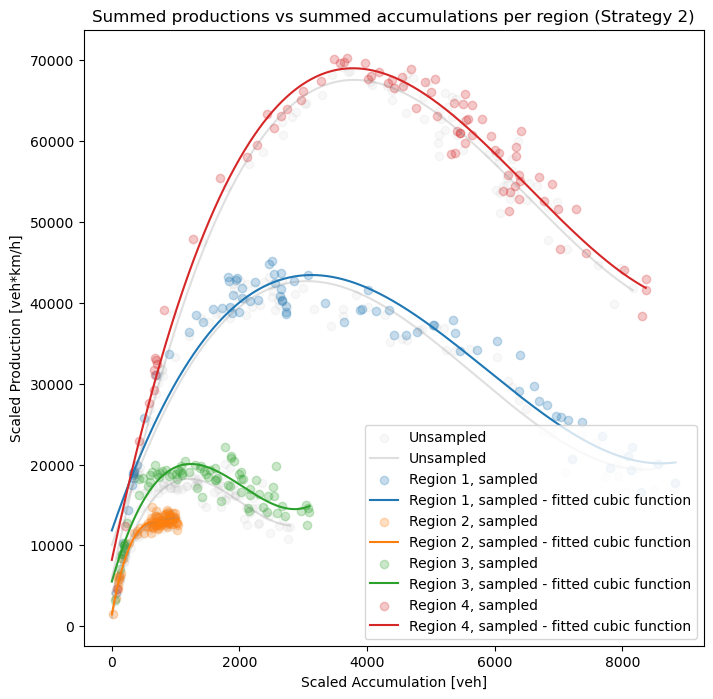

{1: array([ 2.84489629e-07, -5.00588644e-03,  2.29741335e+01,  1.18418848e+04]),
 2: array([ 2.24888763e-05, -5.42082463e-02,  4.34700785e+01,  1.44590111e+03]),
 3: array([ 2.58777472e-06, -1.59153310e-02,  2.74820326e+01,  5.52485058e+03]),
 4: array([ 3.55105848e-07, -6.94374062e-03,  3.72577130e+01,  8.20431074e+03])}

In [26]:
plot_sample_per_region(edges_strategy_2, strategy=2)
plot_sample(edges_strategy_2, strategy=2)

### Strategy 3 - Maximum average flow

In [27]:
average_flow = flow.mean().rename("Average flow")
average_flow.index = pd.to_numeric(average_flow.index)
edges_sorted = edges.merge(average_flow, right_index=True, left_index=True).sort_values(by=["Region", "Average flow"], ascending=False)
edges_strategy_3 = edges_sorted.groupby("Region").apply(lambda x: x.head(len(x)//2))
edges_strategy_3.index = edges_strategy_3.index.get_level_values(1)
edges_strategy_3

,Length (m),Number of lanes,Starting node ID,Ending node ID,Region,region_color,Average flow
Link ID,,,,,,,
9863,37.024865,5,44416,40948,1,C0,90.0375
9853,132.487748,5,44464,44416,1,C0,78.9625
9629,114.562500,5,44510,44464,1,C0,76.5500
9494,115.115723,5,45884,45891,1,C0,68.5500
9496,112.990710,5,45891,45899,1,C0,66.9375
...,...,...,...,...,...,...,...
3144,61.916024,3,21122,21109,4,C3,18.1875
9488,108.685547,2,45853,45954,4,C3,18.1625
513,129.668254,3,19067,21109,4,C3,18.1375


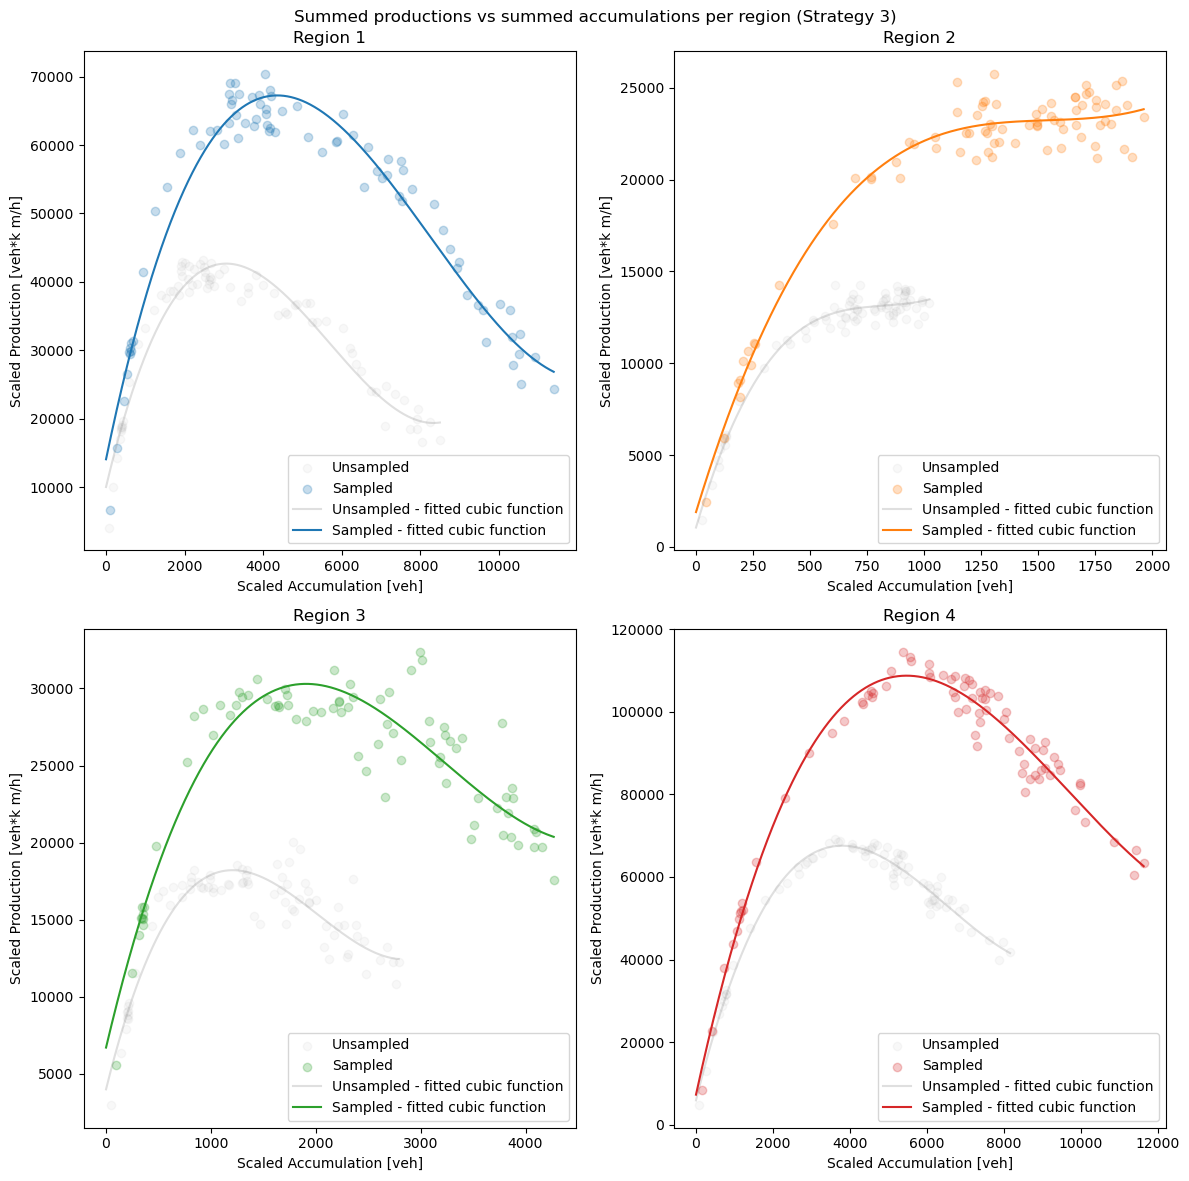

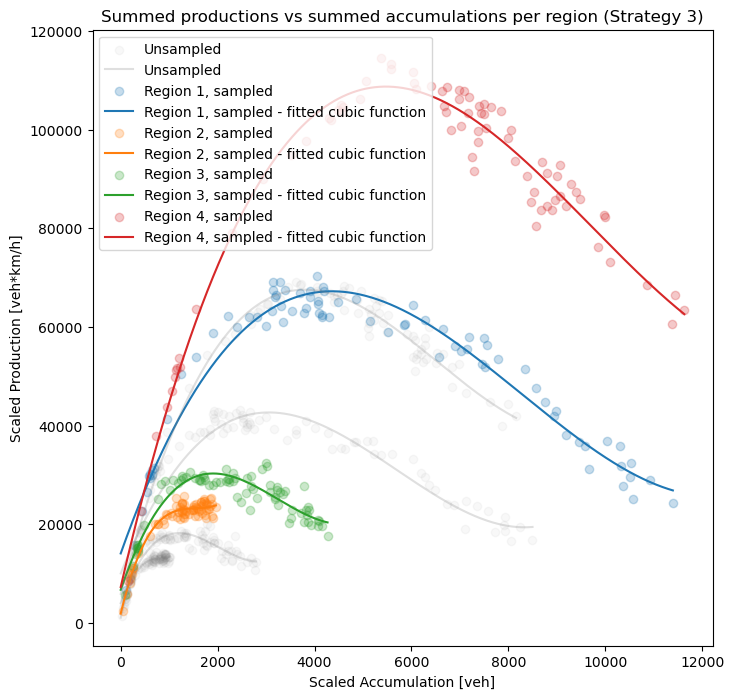

{1: array([ 1.73919812e-07, -4.31381002e-03,  2.76947092e+01,  1.40866675e+04]),
 2: array([ 5.65630587e-06, -2.61447606e-02,  4.07047727e+01,  1.89259775e+03]),
 3: array([ 1.10190928e-06, -1.06861271e-02,  2.87379878e+01,  6.71375022e+03]),
 4: array([ 1.86749227e-07, -5.43234864e-03,  4.26783484e+01,  7.27573367e+03])}

In [28]:
plot_sample_per_region(edges_strategy_3, strategy=3)
plot_sample(edges_strategy_3,  strategy=3)

### Comparaison entre les samples

In [29]:
def plot_mult_sample_per_region(edges_sample1, edges_sample2, edges_sample3, title = f'Comparison between different strategies'):
    regions = [1,2,3,4]
    summed_accumulations = {}
    summed_productions = {}
    polyfit = {}
    summed_accumulations_sample1 = {}
    summed_productions_sample1 = {}
    summed_accumulations_sample2 = {}
    summed_productions_sample2 = {}
    summed_accumulations_sample3 = {}
    summed_productions_sample3 = {}
    polyfit_sample1 = {}
    polyfit_sample2 = {}
    polyfit_sample3 = {}

    scales1 = (edges.groupby("Region")["Length (m)"].sum() / edges_sample1.groupby("Region")["Length (m)"].sum())
    scales2 = (edges.groupby("Region")["Length (m)"].sum() / edges_sample2.groupby("Region")["Length (m)"].sum())
    scales3 = (edges.groupby("Region")["Length (m)"].sum() / edges_sample3.groupby("Region")["Length (m)"].sum())



    plt.figure(figsize=(12,12), tight_layout=True)
    plt.suptitle(title)
    for region in regions:
        plt.subplot(2,2,region)
        plt.title(f"Region {region}")

        summed_accumulations[region] = np.sum(accumulation_region(region), axis = 0)
        summed_productions[region] = np.sum(production_region(region), axis = 0)

        summed_accumulations_sample1[region] = np.sum(accumulation_sample(region, edges_sample1), axis = 0) * scales1[region]
        summed_productions_sample1[region] = np.sum(production_sample(region, edges_sample1), axis = 0) * scales1[region]
        summed_accumulations_sample2[region] = np.sum(accumulation_sample(region, edges_sample2), axis = 0) * scales2[region]
        summed_productions_sample2[region] = np.sum(production_sample(region, edges_sample2), axis = 0) * scales2[region]
        summed_accumulations_sample3[region] = np.sum(accumulation_sample(region, edges_sample3), axis = 0) * scales3[region]
        summed_productions_sample3[region] = np.sum(production_sample(region, edges_sample3), axis = 0) * scales3[region]

        polyfit[region] = np.polyfit(summed_accumulations[region], summed_productions[region], 3)
        polyfit_sample1[region] = np.polyfit(summed_accumulations_sample1[region], summed_productions_sample1[region], 3)
        polyfit_sample2[region] = np.polyfit(summed_accumulations_sample2[region], summed_productions_sample2[region], 3)
        polyfit_sample3[region] = np.polyfit(summed_accumulations_sample3[region], summed_productions_sample3[region], 3)

        xx_unsample = np.linspace(0, np.max([summed_accumulations[region]]), 2001)
        xx_sample1 = np.linspace(0, np.max([summed_accumulations_sample1[region]]), 2001)
        xx_sample2 = np.linspace(0, np.max([summed_accumulations_sample2[region]]), 2001)
        xx_sample3 = np.linspace(0, np.max([summed_accumulations_sample3[region]]), 2001)

        plt.scatter(summed_accumulations[region], summed_productions[region], label = f"Unsampled", color="grey", alpha=0.25)
        plt.plot(xx_unsample, np.polyval(polyfit[region], xx_unsample), label = f"Unsampled - fitted cubic function", color="grey", alpha=0.55)

        plt.scatter(summed_accumulations_sample1[region], summed_productions_sample1[region], label = f"Strategy 1", alpha=0.25, c = f"C{region-1}", marker="x")
        plt.plot(xx_sample1, np.polyval(polyfit_sample1[region], xx_sample1), label = f"Strategy 1 - fitted cubic function", c = f"C{region-1}", linestyle="--")

        plt.scatter(summed_accumulations_sample2[region], summed_productions_sample2[region], label = f"Strategy 2", alpha=0.25, c = f"C{region-1}", marker=".")
        plt.plot(xx_sample2, np.polyval(polyfit_sample2[region], xx_sample2), label = f"Strategy 2 - fitted cubic function", c = f"C{region-1}", linestyle="-.")

        plt.scatter(summed_accumulations_sample3[region], summed_productions_sample3[region], label = f"Strategy 3", alpha=0.25, c = f"C{region-1}", marker="v")
        plt.plot(xx_sample3, np.polyval(polyfit_sample3[region], xx_sample3), label = f"Strategy 3 - fitted cubic function", c = f"C{region-1}", linestyle=":")

        plt.xlabel('Scaled Accumulation [veh]')
        plt.ylabel('Scaled Production [veh*k m/h]')
        #plt.ylim([0, round(max(map(max, summed_productions.values()))*1.1)])
        plt.legend()

    plt.savefig("Pictures/STEP5_ComparaisonStrategies")
    plt.show()


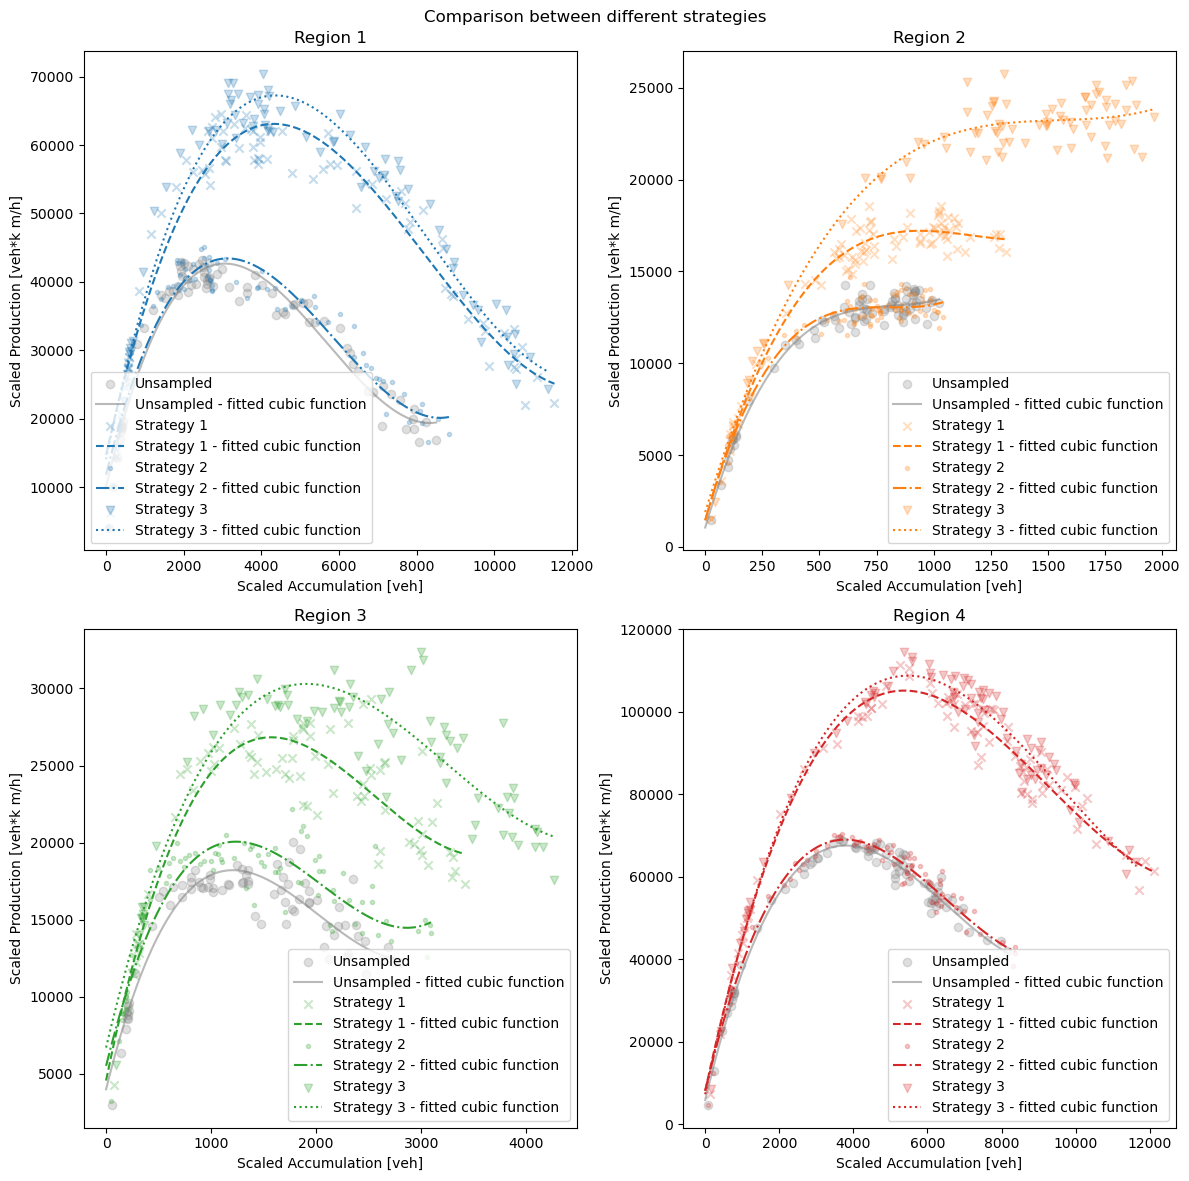

In [30]:
plot_mult_sample_per_region(edges_strategy_1, edges_strategy_2, edges_strategy_3)